# Neural Network Classification

## What we're going to cover

- Architecture of a neural network **classification** model
- Input shapes and output shapes of a **classification** model (features and labels)
- Create custom data to view and fit
- Steps in modelling
  - create a model, compiling a model, fitting a model, evaluating a model
- Different **classification** evaluation methods
- Saving and loading a model

In this book we're going to learn how to write neural network for classification problems. A classification is where you try to classify something as one or another. A few types of classifications problems:

- Binary classification
- Multiclass classification
- Multilabel classification


### Creating data to view and fit


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Neural Network Classification make 100 examples
from sklearn.datasets import make_circles


In [57]:
x, y = make_circles(n_samples=1000, noise=0.03, random_state=42)


In [42]:
pd.DataFrame({'x0': x[:, 0], 'x1': x[:, 1], 'label': y})


,x0,x1,label
0,0.805986,1.213012,1
1,2.303450,-1.163549,0
2,-0.821321,0.351307,0
3,1.562586,-0.428837,0
4,0.919003,-0.249391,0
...,...,...,...
9995,0.860121,1.055851,1
9996,1.003446,0.659014,1
9997,0.366252,0.316837,1
9998,0.532361,0.926104,0


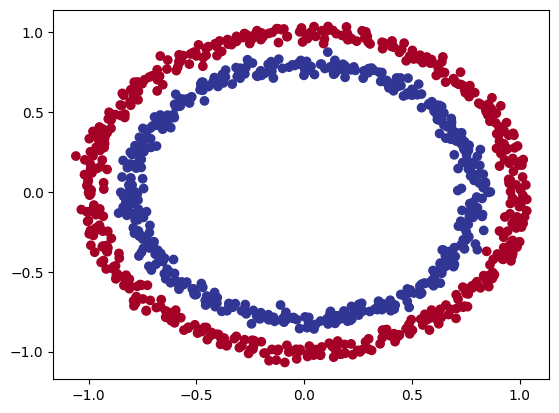

In [58]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)


**Note**: Before pushing forward, spend 10-minute plyaing around with [playground tensorflow](https://playground.tensorflow.org/) building and runing different neural network. See what happen when you change different hyperparameters.

### Input and Output shapes


In [7]:
x.shape, y.shape


((1000, 2), (1000,))

### Steps in Modelling

1. create or import a model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate...


In [59]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

# fit the model
model_1.fit(x, y, epochs=5, verbose=0)

# Evaluate
model_1.evaluate(x, y)


32/32 [==============================] - 0s 6ms/step - loss: 0.7498 - accuracy: 0.4920


[0.7497811913490295, 0.492000013589859]

In [60]:
# Let's try and improve our model by training for longer...
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)


32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50 accuracy.. it's performing as so, let's step things up a notch and add an extra layer.


In [61]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile a model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

# fit the model
model_2.fit(x, y, epochs=100, verbose=0)
model_2.evaluate(x, y)


32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933515667915344, 0.5]

### Improving our model

Let's look into our bag of tricks to see how we can improve our model

Common ways to improve a deep model:

- Adding layers
- Increase the numbers of hidden units
- Change the activation functions
- Change the optimization function
- Chnage the learning rate
- Fitting on more data
- Fitting for longer

1. create a model - we weight to add more layers or increase the number of hidden units within a layer.
2. compiling a model - here we might to choose a different optimization function such as Adam


In [81]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# fit the model
model_3.fit(x, y, epochs=100, verbose=0)

# evaluate
model_3.evaluate(x, y)


32/32 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.5100


[0.6996919512748718, 0.5099999904632568]

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

- Take in a trained model, features (x) and labels (y)
- Create a meshgrid of the different x values
- Make predictions across the meshgrid
- Plot the predictions as well as a line between zones (where each unique class falls)


In [83]:
def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on x.
    This function was inpired by two resourse.

    see: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # create x value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

    # make predictions
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred[0]) > 1:
        print(f'doing multiclass classification')

        # we have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print(f'doing binary classification')

        # we have to reshape our prediction to get them ready for plotting
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


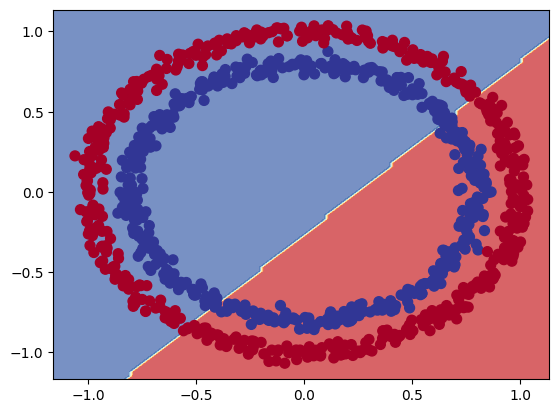

In [84]:
# check out the predictions our model is making
plot_decision_boundary(model_3, x, y)


In [85]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)  # y = x + 100

# Split our regression data into training and test data
x_reg_train, x_reg_test = x_regression[:150], x_regression[150:]
y_reg_train, y_reg_test = y_regression[:150], y_regression[150:]


In [86]:
tf.size(x_reg_train), tf.size(x_reg_test), tf.size(x_regression)


(<tf.Tensor: shape=(), dtype=int32, numpy=150>,
 <tf.Tensor: shape=(), dtype=int32, numpy=50>,
 <tf.Tensor: shape=(), dtype=int32, numpy=200>)

Oh wait... we compiled our model for a binary classification problem. But we're now working on a regression problem, le's change the model to suit our data


In [87]:
# set the random seed
tf.random.set_seed(42)

# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

# fit the model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1),
            tf.expand_dims(y_reg_train, axis=-1), epochs=100, verbose=0)

# evaluate
model_3.evaluate(tf.expand_dims(x_reg_train, axis=-1),
                 tf.expand_dims(y_reg_train, axis=-1))

# x_reg_train.ndim, tf.expand_dims(x_reg_train, axis=-1).ndim

5/5 [==============================] - 0s 2ms/step - loss: 36.9533 - mae: 36.9533


[36.953277587890625, 36.953277587890625]

2/2 [==============================] - 0s 2ms/step


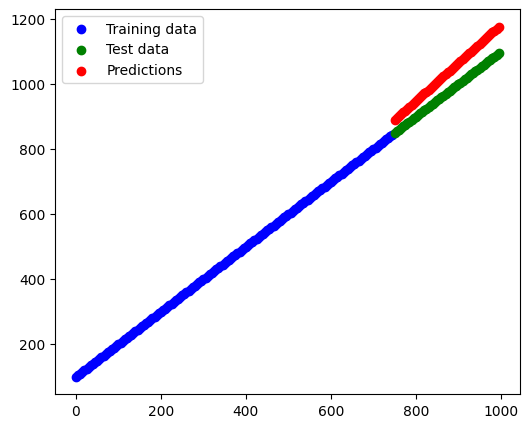

In [88]:
# Make prediction with our trained model
y_reg_pred = model_3.predict(tf.expand_dims(x_reg_test, axis=-1))

# plot the model's predictions agains our regression data
plt.figure(figsize=(6, 5))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(x_reg_test, y_reg_pred, c='r', label='Predictions')
plt.legend()


### The missing piece: Non-linearity


In [89]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# compile the model
model_4.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001), metrics=['accuracy'])

# fit the model
model_4.fit(x, y, epochs=100, verbose=0)

# evaluate
model_4.evaluate(x, y)


32/32 [==============================] - 0s 2ms/step - loss: 0.8041 - accuracy: 0.4800


[0.8040979504585266, 0.47999998927116394]

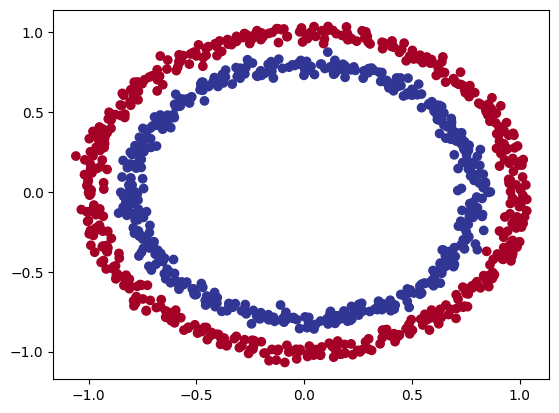

In [90]:
# check out our model data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)


313/313 [==============================] - 0s 1ms/step
doing binary classification


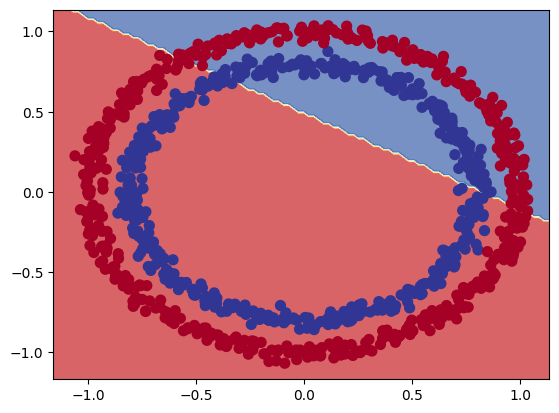

In [91]:
# check the decision boundary for our model
plot_decision_boundary(model_4, x, y)


Let's try build our first neural network with non-linear activation function


In [92]:
# set random seed
tf.random.set_seed(42)

# create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# fit the model
model_5.fit(x, y, epochs=100, verbose=0)

# evaluate
model_5.evaluate(x, y)


32/32 [==============================] - 0s 3ms/step - loss: 0.7953 - accuracy: 0.5000


[0.7953168153762817, 0.5]

313/313 [==============================] - 0s 916us/step
doing binary classification


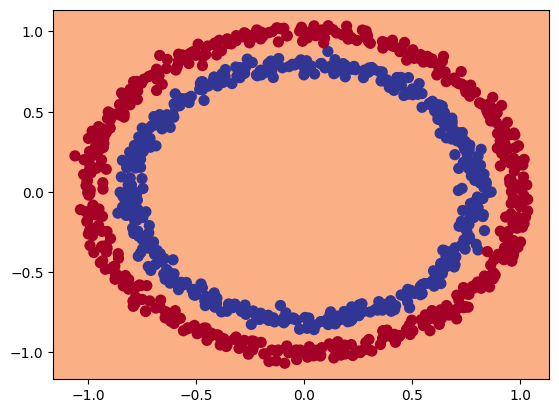

In [93]:
plot_decision_boundary(model_5, x, y)


In [94]:
# Time to replicate the multi-layer neural network from Tensorflow playground

# set the random seed
tf.random.set_seed(42)

#  create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# fit the model
history = model_6.fit(x, y, epochs=250, verbose=0)

# evaluate the model
model_6.evaluate(x, y)


32/32 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.9370


[0.18019573390483856, 0.9369999766349792]

313/313 [==============================] - 0s 1ms/step
doing binary classification


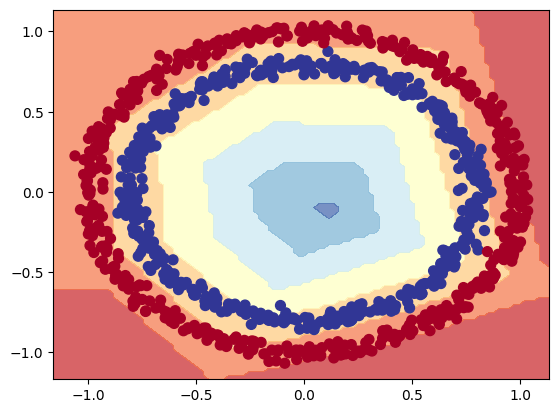

In [95]:
plot_decision_boundary(model_6, x, y)


### Binary Classification

The output layer contains a single neuron in order to make predictions. It uses the **sigmoid activation function** in order to produce a probability output in the range of 0 to 1 that can easy and automatically be converted to crisp class values.


In [96]:

# set the random seed
tf.random.set_seed(42)

#  create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# fit the model
history = model_7.fit(x, y, epochs=100, verbose=0)

# evaluate the model
model_7.evaluate(x, y)


32/32 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.7090


[0.6506048440933228, 0.7089999914169312]

313/313 [==============================] - 1s 1ms/step
doing binary classification


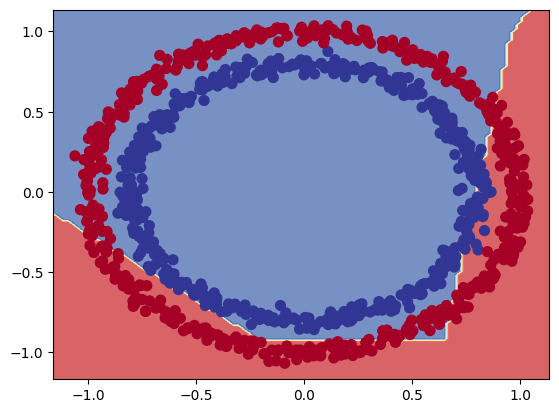

In [97]:
plot_decision_boundary(model_7, x, y)


**Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamental of neural networks.

Now we've discussed the concept of linear and non-linear functions (lines), let's see them in action.


## Activation Functions

- see: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

The most common activation functions can be divided into three categories: ridge functions, radial functions and fold functions. Non-saturating activation functions, such as ReLU, may be better than saturating activation functions, as networks using are less likely to suffer from the vanishing gradient problem

**Ridge activation functions**

Main article: Ridge function Ridge functions are multivariate functions acting on a linear combination of the input variables. Often used examples include:

- Linear activation: ${\displaystyle \phi (\mathbf {v} )=a+\mathbf {v} '\mathbf {b} }$
- ReLU activation: ${\displaystyle \phi (\mathbf {v} )=\max(0,a+\mathbf {v} '\mathbf {b} )}$
- Heaviside activation: ${\displaystyle \phi (\mathbf {v} )=1_{a+\mathbf {v} '\mathbf {b} >0}}$
- Logistic activation:${\displaystyle \phi (\mathbf {v} )=(1+\exp(-a-\mathbf {v} '\mathbf {b} ))^{-1}}$


### Tensorflow Sigmoid Activation Function

- see: https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid

Sigmoid Activation Function, `sigmoid(x) = 1 / (1 + exp(-x))`

```python
    def sigmoid_keras(x):
        return tf.keras.activations.sigmoid(x)

    def sigmoid_tf(x):
        return 1 / (1 + tf.exp(-x))

    def sigmoid_np(x):
        return 1 / (1 + np.exp(-x))
```

Exemple:

```python

a = tf.constant([-20, -1.0, 0.0, 1.0, 20], dtype=tf.float32)
b = tf.keras.activations.sigmoid(a)
b.numpy()
```

Output:

```python
array([2.0611535e-09, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       1.0000000e+00], dtype=float32)
```


In [103]:
a = tf.constant([-20, -1.0, 0.0, 1.0, 20], dtype=tf.float32)
b = tf.keras.activations.sigmoid(a)
b.numpy()


array([2.0611535e-09, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       1.0000000e+00], dtype=float32)

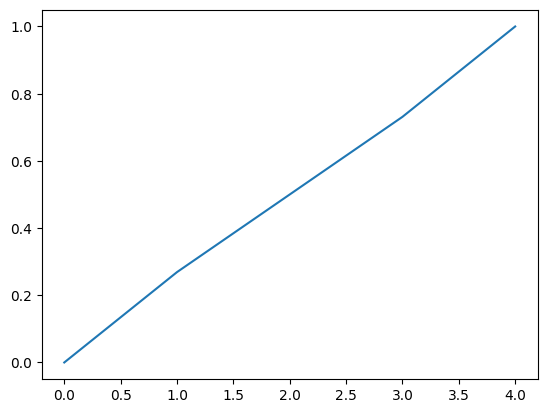

In [104]:
plt.plot(b)


In [107]:
# create a toy a tensor (similar to the data we pass into our model)
a = tf.cast(tf.range(-10, 10), dtype=tf.float32)
a


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

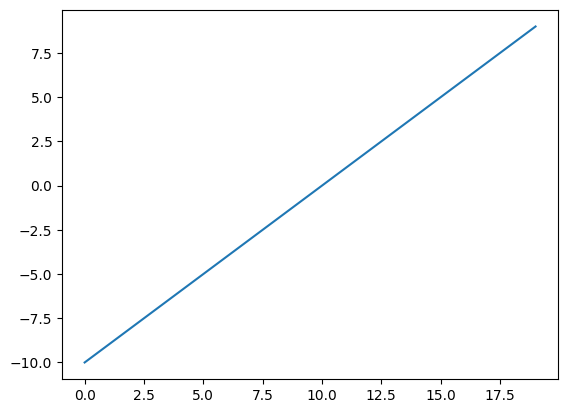

In [108]:
# let's visualize our toy tensor
plt.plot(a)


### Sigmoid Function

- see: https://en.wikipedia.org/wiki/Sigmoid_function

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve.
A common example of a sigmoid function is the logistic function shown in the first figure and defined by the formula

${\displaystyle \sigma (x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}}=1-\sigma (-x).}$


In [105]:
def sigmoid_keras(x):
    return tf.keras.activations.sigmoid(x)


def sigmoid_tf(x):
    return 1 / (1 + tf.exp(-x))


def sigmoid_np(x):
    return 1 / (1 + np.exp(-x))


In [118]:
sigmoid_keras(a).numpy(), sigmoid_tf(a).numpy(), sigmoid_np(a)


(array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
        2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
        8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
        9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
       dtype=float32),
 array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
        2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
        8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
        9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
       dtype=float32),
 array([4.53978682e-05, 1.23394580e-04, 3.35350138e-04, 9.11051175e-04,
        2.47262325e-03, 6.69285096e-03, 1.79862101e-02, 4.74258736e-02,
        1.19202934e-01, 2.68941402e-01, 5.00000000e-01, 7.31058598e-01,
        8.80797029e-01, 9.52574134e-01, 9.82013762e-01, 

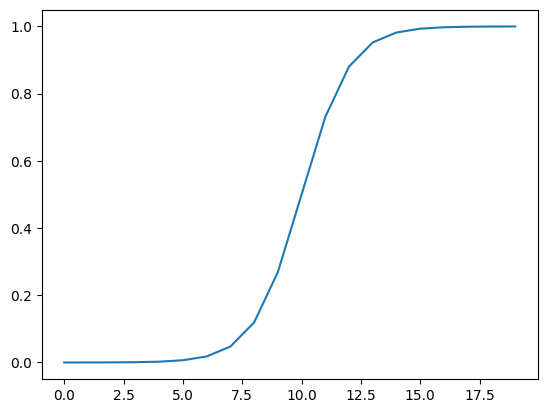

In [111]:
plt.plot(sigmoid_np(a))


### ReLu (Rectified Linear Unit) Activation Function

With default values, this returns the standard **ReLu activation** max(x, 0), the element-wise maximum of 0 and the input tensor. Modifyinng default parameter allows you to use non-zero thresolds, change the max values of the activation, and to use a non-zero multiple of the input for values below the thresold.

${\displaystyle {\begin{aligned}(x)^{+}\doteq {}&{\begin{cases}0&{\text{if }}x\leq 0\\x&{\text{if }}x>0\end{cases}}\\={}&\max(0,x)=x{\textbf {1}}_{x>0}\end{aligned}}}$

In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.

${\displaystyle {\begin{aligned}R(z) = \begin{Bmatrix} z & z > 0 \\ 0 & z <= 0 \end{Bmatrix}\end{aligned}}}$


In [122]:
# let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)


def relu_np(x):
    return np.maximum(0, x)

In [123]:
# pass our toy tensor to our custom relu function
relu(a).numpy(), relu_np(a)


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
        7., 8., 9.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
        7., 8., 9.], dtype=float32))

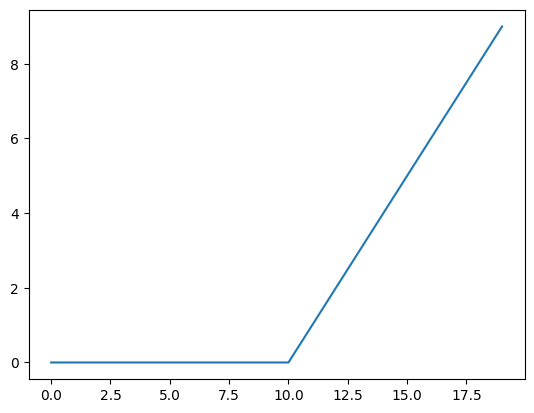

In [124]:
plt.plot(relu(a))


## TensorFlow Linear Activation Function

- see: https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear

Linear Activation Function (pass-through)

```python
    tf.keras.activations.linear(x)
```

Exemple:

```python
    a = tf.constant([-3.0, -1.0, 0.0, 1.0, 3.0], dtype=tf.float32)
    b = tf.keras.activations.linear(b)
    b.numpy()
```

Output:

```python
array([2.0611535e-09, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       1.0000000e+00], dtype=float32)
```

### Linear

${\displaystyle {\begin{aligned}R(z,m) = \begin{Bmatrix} z*m \\ \end{Bmatrix}\end{aligned}}}$  
A straight line function where activation is proportional to input ( which is the weighted sum from neuron ).


In [125]:
a = tf.constant([-3.0, -1.0, 0.0, 1.0, 3.0], dtype=tf.float32)
b = tf.keras.activations.linear(b)
b.numpy()


array([2.0611535e-09, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       1.0000000e+00], dtype=float32)

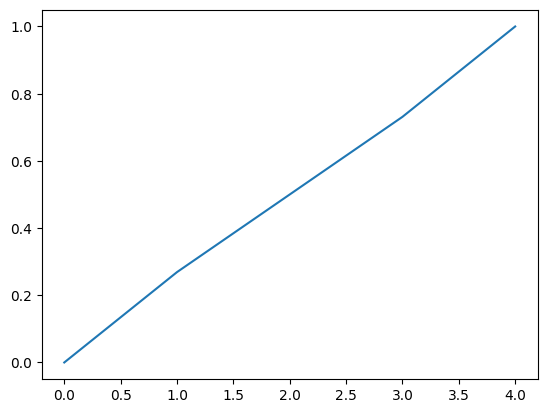

In [127]:
plt.plot(b)


### Evaluating and improving our classification

so far we've been training and testing on the same dataset... however, in machine learning this is basically a sin. So let's create a training and test set.


In [128]:
# check how many examples we have
len(x)


1000

In [131]:
# split into train and test sets
x_train, x_test = x[:800], x[800:]
y_train, y_test = y[:800], y[800:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((800, 2), (200, 2), (800,), (200,))

In [145]:
# let's recreate a model to fit on the training data and evaluate on the test data
# set random seed
tf.random.set_seed(42)

# create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# fit the model
history = model_8.fit(x_train, y_train, epochs=25, verbose=0)

# evaluate the model
model_8.evaluate(x_test, y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.6850


[0.5682084560394287, 0.6850000023841858]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


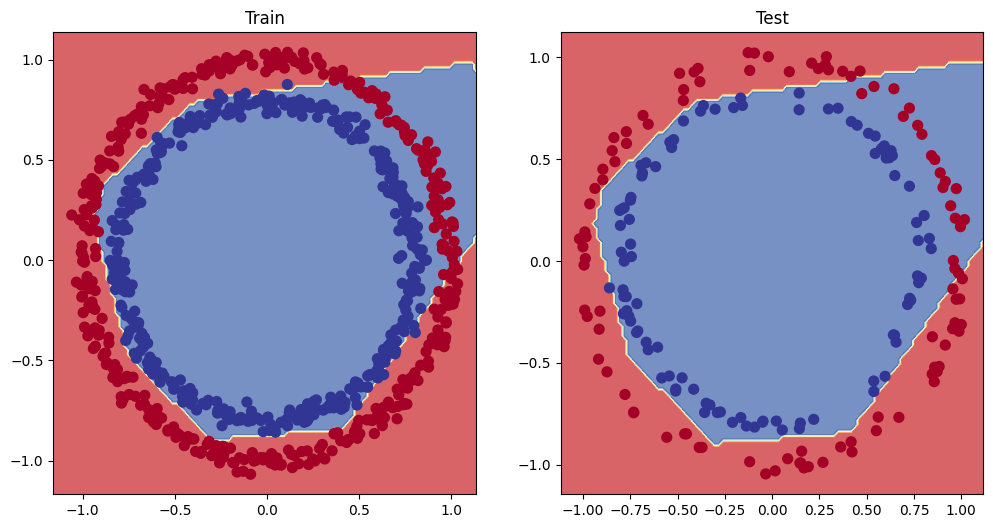

In [141]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model=model_8, x=x_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model=model_8, x=x_test, y=y_test)
plt.show()


### Plot the loss or training data


Text(0.5, 1.0, 'Model_8 loss curves')

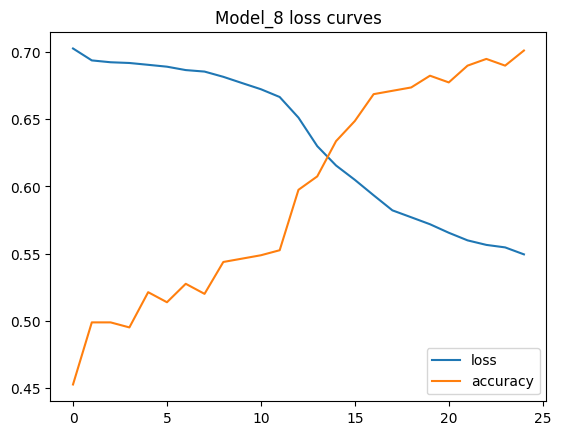

In [146]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')


**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).


### Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decrease the most during training) we're going to use the following stes:

- A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your _while_ its training.
- Another model (we could use the same one as above, but we're practining building models)
- A modified loss curves plot


schedule: a function that takes an epoch index (integer, indexed from 0)

Learning rate scheduler.

At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at **init**, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.

Args:
schedule: a function that takes an epoch index (integer, indexed from 0)
and current learning rate (float) as inputs and returns a new learning rate as output (float).
verbose: int. 0: quiet, 1: update messages.

Example:

```python
# This function keeps the initial learning rate for the first ten epochs
# and decreases it exponentially after that.
def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * tf.math.exp(-0.1)

model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')

round(model.optimizer.lr.numpy(), 5) # 0.01

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(np.arange(100).reshape(5, 20),
                    np.zeros(5),
                    epochs=15,
                    callbacks=[callback],
                    verbose=0)

round(model.optimizer.lr.numpy(), 5) # 0.00607
```


In [157]:
# set random seed
tf.random.set_seed(42)

# create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(x_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler],
                        verbose=0)
# evaluate the model
model_9.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4950


[0.6934458017349243, 0.4950000047683716]

<AxesSubplot:>

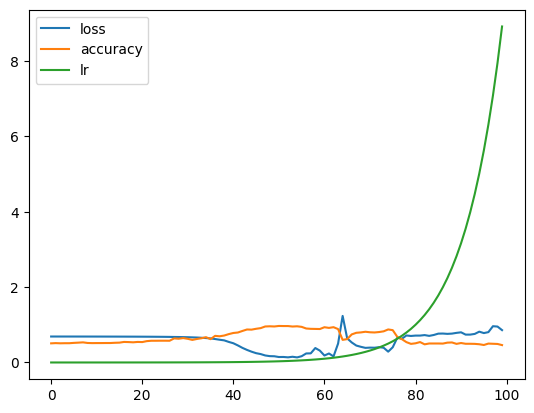

In [158]:
# plot the history model
pd.DataFrame(history_9.history).plot()


Text(0.5, 1.0, 'Learning rate vs Loss')

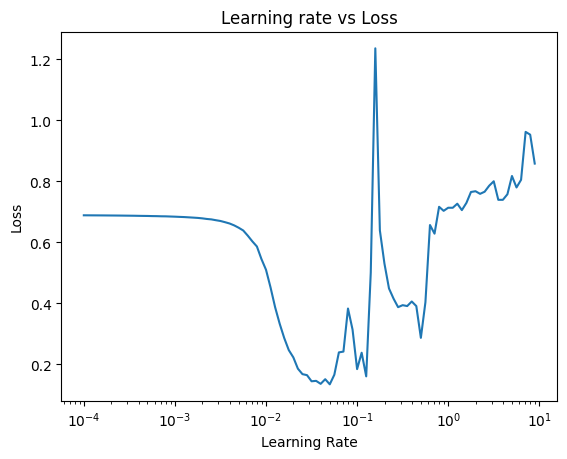

In [161]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')


In [163]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4, 1e-2


(1, 0.1, 0.01, 0.001, 0.0001, 0.01)

In [164]:
# Let's try using a higher ideal learning rate with the same model

# set random seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# compile the model with the ideal learning rate
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), metrics=['accuracy'])

# fit the model for 20 epochs
history_10 = model_10.fit(x_train, y_train, epochs=20, verbose=0)

# evaluate the model
model_10.evaluate(x_test, y_test)


7/7 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9900


[0.0373668447136879, 0.9900000095367432]

<AxesSubplot:>

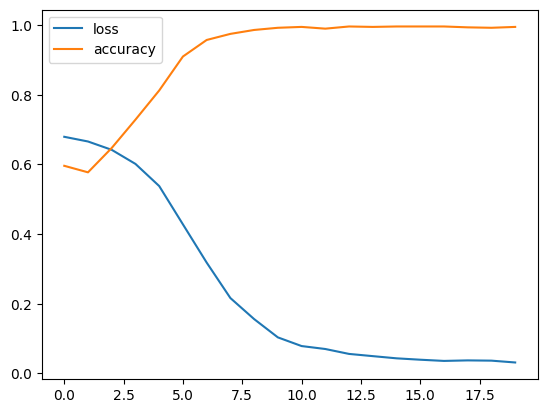

In [165]:
# plot the history model
pd.DataFrame(history_10.history).plot()


313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


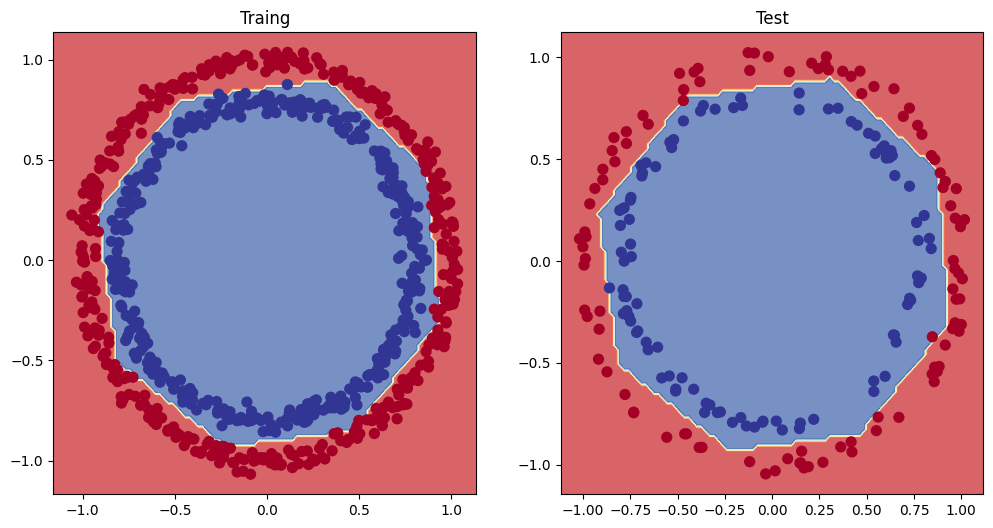

In [167]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Traing')
plot_decision_boundary(model_10, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, x_test, y_test)


## Classification evaluation methods

| True Positive | True Negative | False Positive | False Negative |
| ------------- | ------------- | -------------- | -------------- |
| TP            | TN            | FP             | FN             |

| Metric Name      | Metrics Forumla                                                | Code                                                             | When to use                                                                                    |
| ---------------- | -------------------------------------------------------------- | ---------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- |
| Accuracy         | Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$                 | tf.keras.metrics.Accuracy() or sklearn.metrics.accuracy_score()  | Default metrics for classification. Not the best for imbalanced                                |
| Precision        | Precision = $\frac{TP}{TP+FP}$                                 | tf.keras.metrics.Precison() or sklearn.metrics.precision_score() | Higher precision leads to less false positives                                                 |
| Recall           | Recal = $\frac{TP}{TP + FN}$                                   | tf.keras.metrics.Recall() or sklearn.metrics.recall_score()      | Higher recall leads to less false negatives                                                    |
| F1-score         | F1-score = $2 . \frac{precision . recall}{precision + recall}$ | sklearn.metrics.f1_score()                                       | Combination of precision and recall, usually a good overall metrcis for a classification model |
| Confusion Matrix | None                                                           | Custom function or sklearn.metrics.confusion_matrix()            | When comparing predictions to thruth labels to see where model gets confused.                  |


### More classification evaluating methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix
- Classification report (from sklearn) see: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [169]:
# check the accuracy of our model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f'Model loss on the test set: {(loss*100):.2f}%')
print(f'Modl accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 0.9900
Model loss on the test set: 3.74%
Modl accuracy on the test set: 99.00%


In [170]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_10.predict(x_test)


# create the confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [171]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [172]:
y_preds[:10]

array([[0.9987565 ],
       [0.9989268 ],
       [0.9984458 ],
       [0.99827015],
       [0.06356227],
       [0.0168028 ],
       [0.94850963],
       [0.00222803],
       [0.99850404],
       [0.3358386 ]], dtype=float32)

Oops.. looks like our predictions array has come out in **prediction probability** form.. the standard output from the sigmoid (or sofmax) activation functions


In [173]:
# convert prediction probabilities to binary format and view the first 10
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [174]:
# confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

How about we prettify our confusion matrix

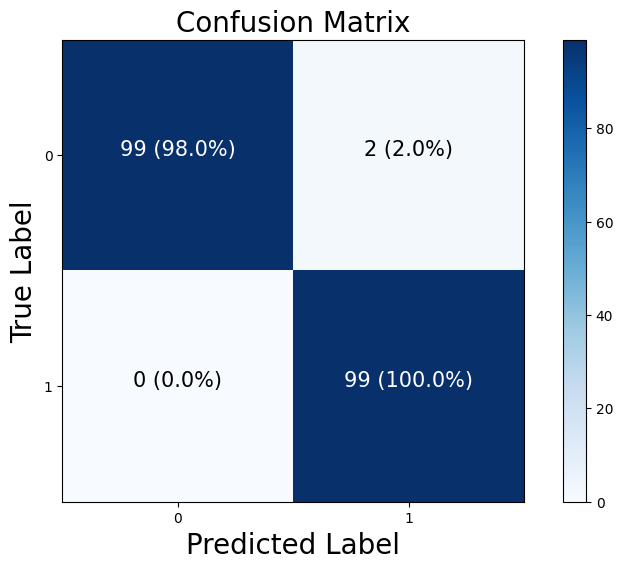

In [181]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# see: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#examples-using-sklearn-metrics-classification-report
import itertools

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
# normize our confusio matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[: np.newaxis]
n_classes = cm.shape[0]


# let's prettify it
fig, ax = plt.subplots(figsize=(10, 6))

# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       )

# set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set thresold for different colors
threshold = (cm.max() + cm.min()) / 2

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=15)